In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# default_exp eda

# 温室温度预测挑战赛
http://challenge.xfyun.cn/topic/info?type=temperature

## 一、赛事背景

随着计算机技术的发展，我国逐渐实现了从传统农业到现代农业的转变，正逐步迈向智慧农业。温室是现代农业技术应用的典型场景，其内部环境具有可操作性，能人为形成适宜植物生长的小型封闭生态系统，提升农产品的产量和质量，因此被广泛应用于农业生产中。在温室的各项环境因子中，作物对温度最为敏感。温度的高低影响植株细胞的酶活性，从而影响作物的生长速度、产量和质量，因此温度对作物生长发育影响极大。为了保证农产品的产量和质量，应保证作物正常生长，需对温室温度进行精确的调控。

## 二、赛事任务

温室温度调控需要对温室温度进行精准的预测，本次大赛提供了中国农业大学涿州实验站的温室温度数据作为样本，参赛选手需基于提供的样本构建模型，预测温室温度变化情况。

## 三、评审规则

### 1.数据说明：

本次比赛为参赛选手提供了温室内外的部分传感器数据，包括温室内的温度、湿度、气压以及温室外的温度、湿度、气压。

本次比赛分为初赛和复赛两个阶段，初赛阶段提供约30天的传感器数据，其中前20天的数据作为训练数据，后10天的数据用于做温度预测；复赛阶段提供约15天的传感器数据，其中前10天的数据作为训练数据，后5天的数据用于做温度预测。

注1：训练集的数据，每1分钟1条数据记录；测试集的数据，每30分钟1条数据记录。

注2：选手不能利用“未来的实际数据”预测“过去的数据”，例如，假设要预测2020/6/18 08:08:08的室内温度，就不能利用这个时间点以后的真实数据进行预测。

特别说明，温室内的湿度和气压以及温室外的温度、湿度和气压会对温室内的温度产生一定的影响。

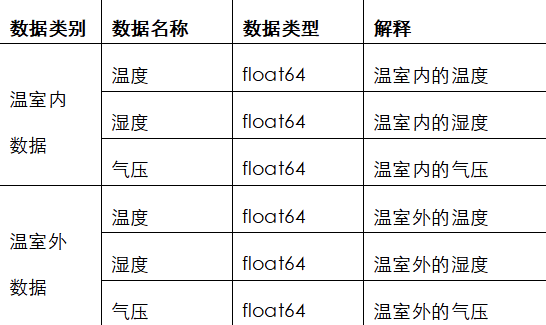

### 2.评估指标

本模型依据提交的结果文件，采用均方误差MSE进行评价。 观测值，预测值，待预测的记录数n，计算公式如下：
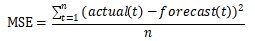

### 3.评测及排行

1、初赛和复赛均提供下载数据，选手在本地进行算法调试，在比赛页面提交结果。

2、每支团队每天最多提交3次。

3、比赛采用AB榜，A榜成绩供参赛队伍比赛中查看，最终比赛排名采用选手选择两个作品中B榜最佳成绩；
## 四、作品提交要求

1、文件格式：按照csv格式提交

2、文件大小：无要求

3、提交次数限制：每支队伍每天最多3次

4、文件详细说明：

1) 以csv格式提交，编码为UTF-8，第一行为表头；

2) 提交格式见样例

5、不需要上传其他文件
## 五、赛程规则
初赛 6月22日——8月21日

    初赛截止成绩以团队在初赛时间段内最优成绩为准（不含测试排名）。

    初赛作品提交截止日期为８月20日17:00；初赛名次公布日期为8月21日10:00。

复赛 8月21日——9月21日

    排名前20%的团队晋级复赛，大赛官网将公示团队信息。选手通过大赛官网下载新增的训练集和开发集，本地调试算法，在线提交结果。

    复赛成绩以参赛团队在复赛时间段内最优成绩为准。

    复赛作品提交截止日期为９月20日17:00；复赛名次公布日期为９月21日10:00。

决赛 10月24日

    前三名团队将受邀参加科大讯飞全球1024开发者节并于现场进行决赛。

    决赛以答辩（10min陈述+5min问答）的形式进行。

    根据复赛成绩和答辩成绩综合评分（复赛成绩占比70%，现场答辩分数占比30%）。

## 六、奖项设置

    入围复赛

        复赛入围证书

        大赛专属Geek礼包

        大赛限量文化衫

    入围决赛

        科大讯飞1024开发者节全场通票

        决赛入围证书

        科大讯飞创孵基地绿色入驻通道

        A.I.服务市场入驻特权

    决赛胜出

        决赛奖金，各赛道TOP10选手将阶梯获得赛道奖金，第一名3万元、第二名2万元、第三名1万元、第四-第十名分别获得“算法菁英奖”2500元。

        参与1024全球开发者节颁奖盛典，现场授予奖金、证书与定制奖杯

        A.I.全链创业扶持

        绿色就业通道&讯飞Offer

# lib导入

In [2]:
# export
import os
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

from sklearn.metrics import classification_report, accuracy_score

In [3]:
import sys
sys.path.append('..')
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.utils.pickle import PickleWrapper


# load data

In [4]:
args.DATA_DIR

'../../data/contest/20kdxf/'

In [12]:
!tree ../../data/contest/20kdxf/

../../data/contest/20kdxf/
├── sub.csv
├── test
│   └── test.csv
└── train
    └── train.csv

2 directories, 3 files


# EDA

In [11]:
train = pd.read_csv(os.path.join(args.DATA_DIR,'train/train.csv'))

train.head()

,time,年,月,日,小时,分钟,秒,温度(室外),湿度(室外),气压(室外),湿度(室内),气压(室内),temperature
0,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4
1,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4
2,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4
3,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4
4,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3


In [15]:
test = pd.read_csv(os.path.join(args.DATA_DIR,'test/test.csv'))
test.columns =['time', '年', '月', '日', '小时', '分钟', '秒', '温度(室外)', '湿度(室外)', '气压(室外)',
       '湿度(室内)', '气压(室内)']
test.head()

,time,年,月,日,小时,分钟,秒,温度(室外),湿度(室外),气压(室外),湿度(室内),气压(室内)
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9


In [13]:
sub = pd.read_csv(os.path.join(args.DATA_DIR,'sub.csv'))

sub.head()

,time,temperature
0,1554224413,15.7
1,1554226217,15.7
2,1554228020,15.7
3,1554229823,15.7
4,1554231625,15.7
